In [ ]:
%pip install pandas numpy matplotlib seaborn plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



Note: you may need to restart the kernel to use updated packages.
Detected delimiter: '|'

Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391

C:\Users\Yohanan\AppData\Local\Temp\ipykernel_12360\1018119369.py:20: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MachineLearningRating_v3.csv")



Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.00000

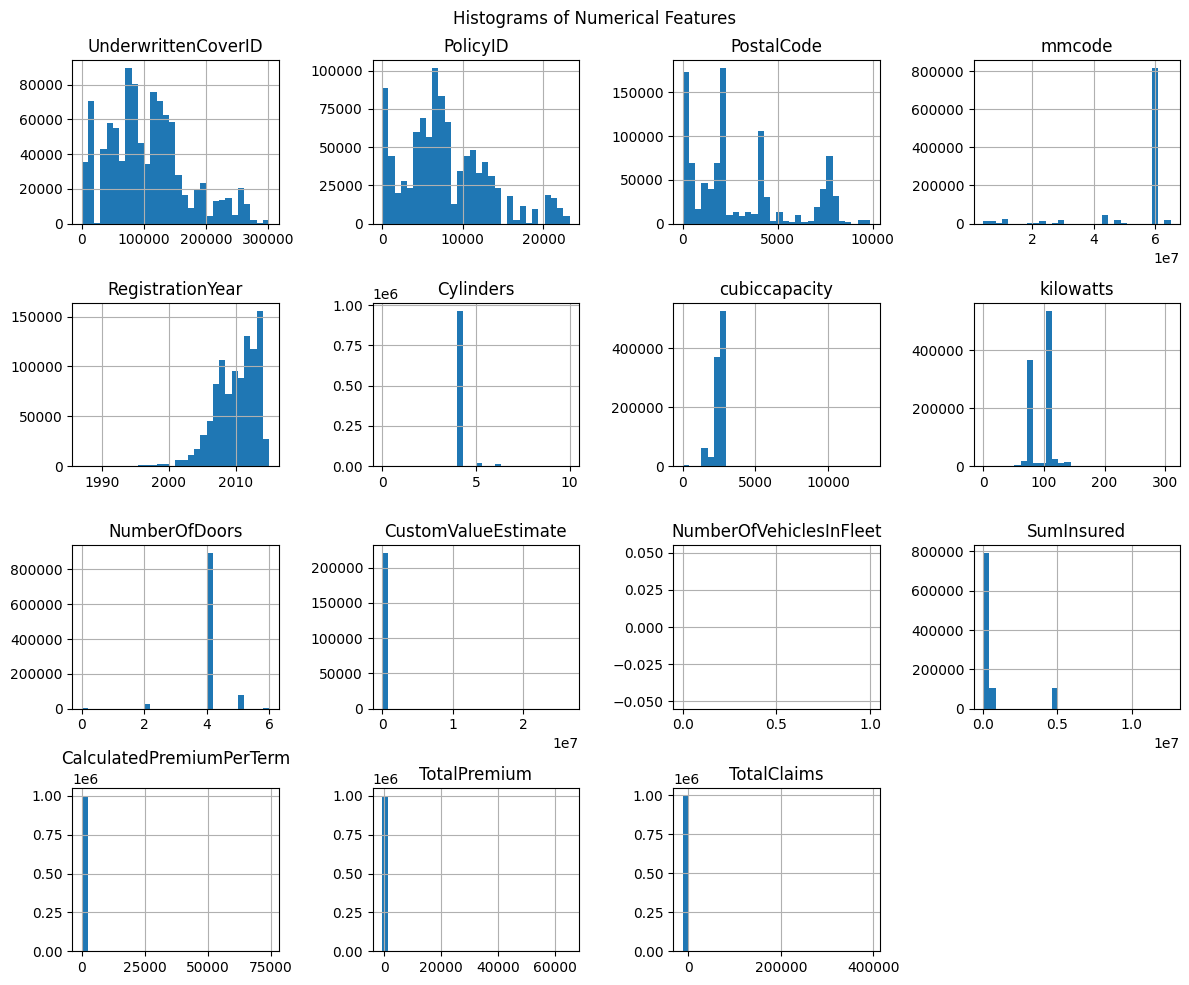

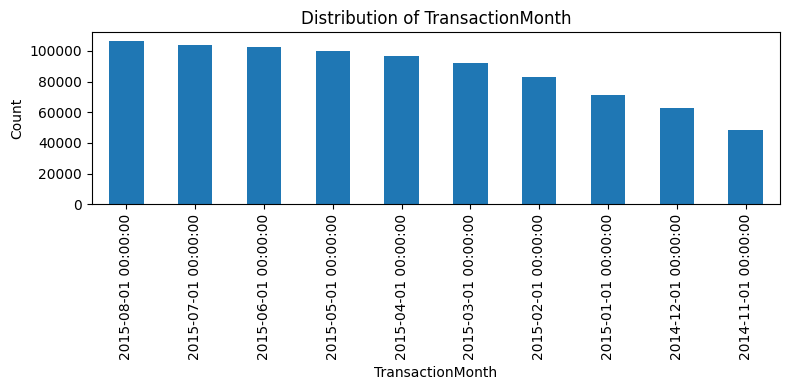

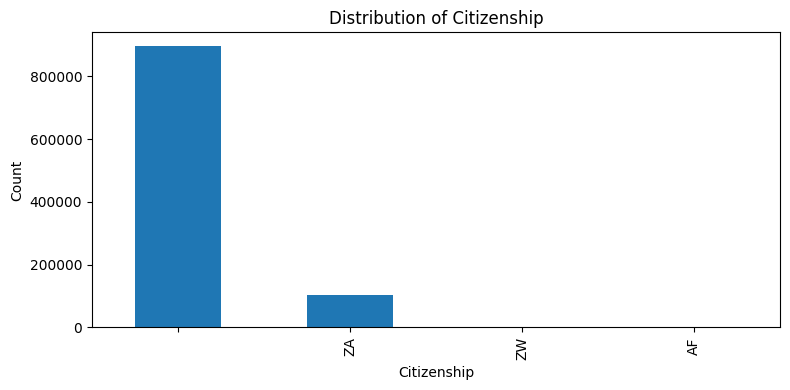

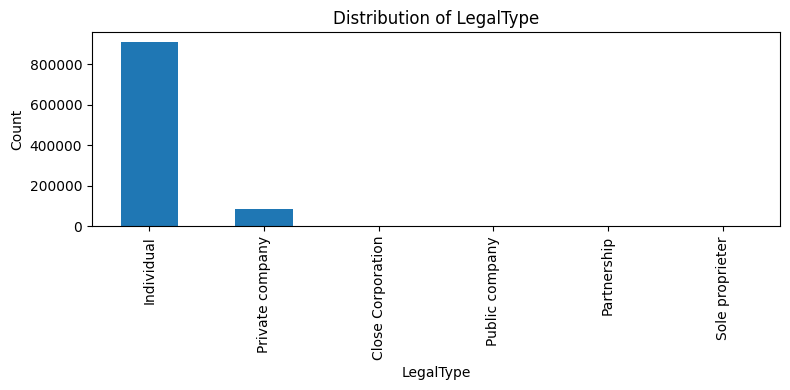

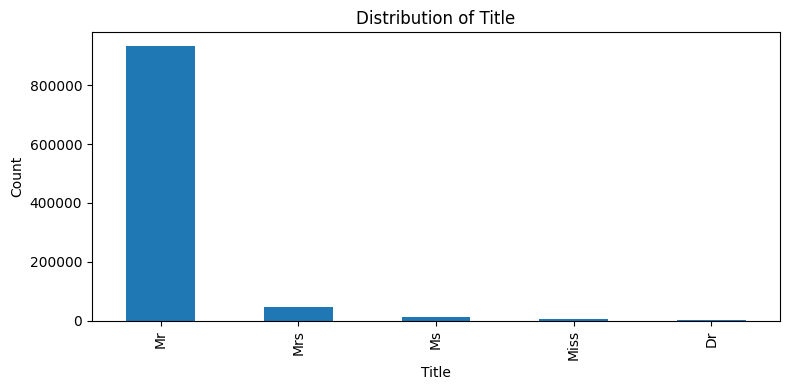

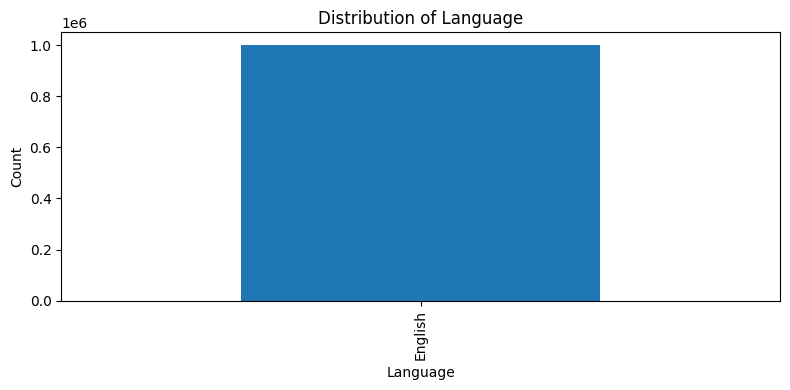

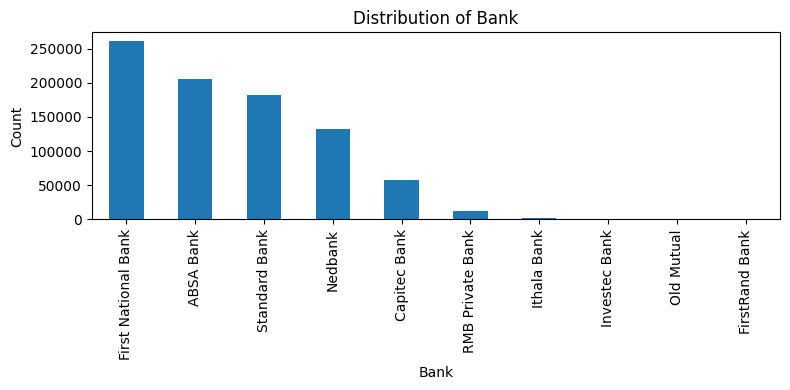

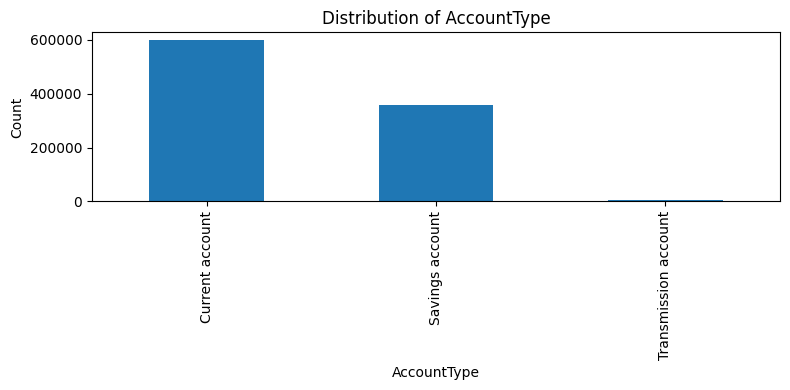

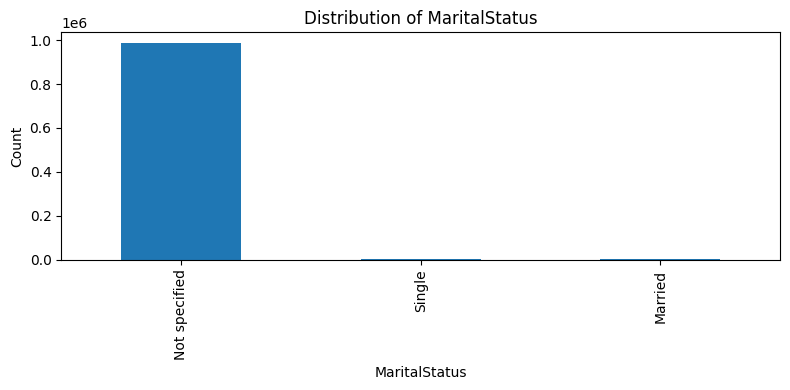

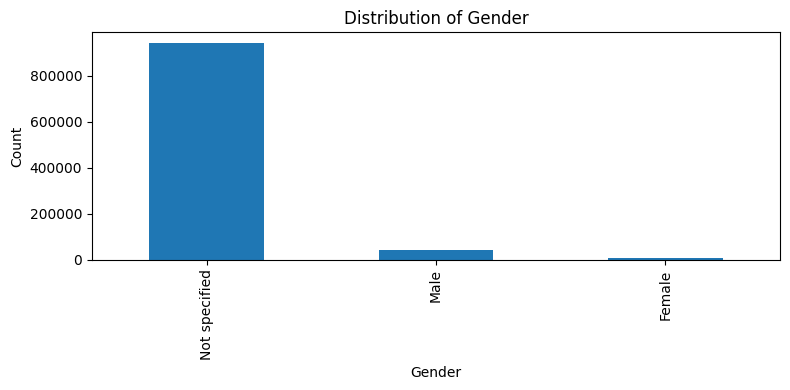

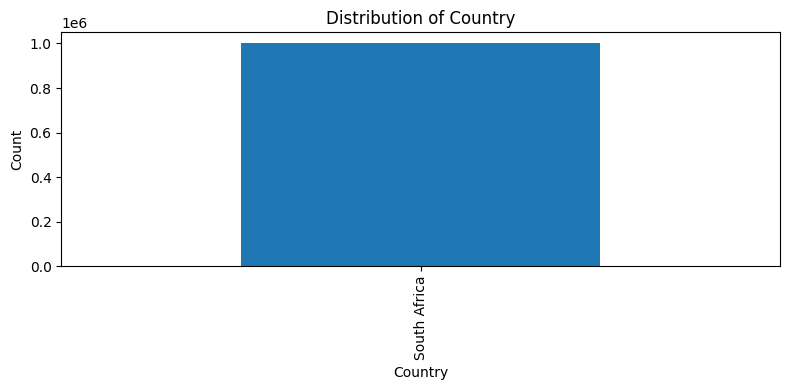

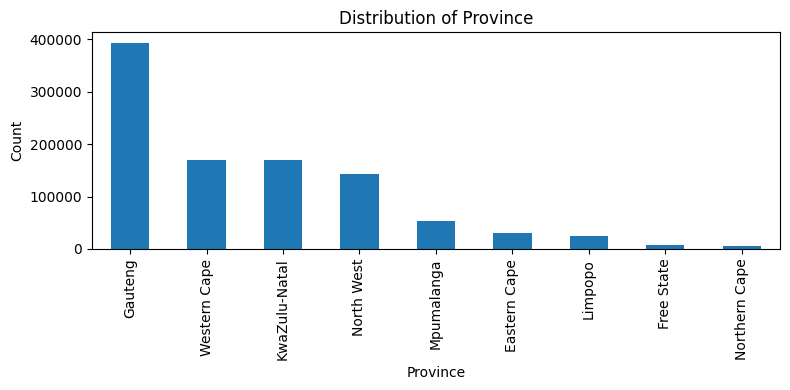

C:\Users\Yohanan\AppData\Local\Temp\ipykernel_12360\1018119369.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


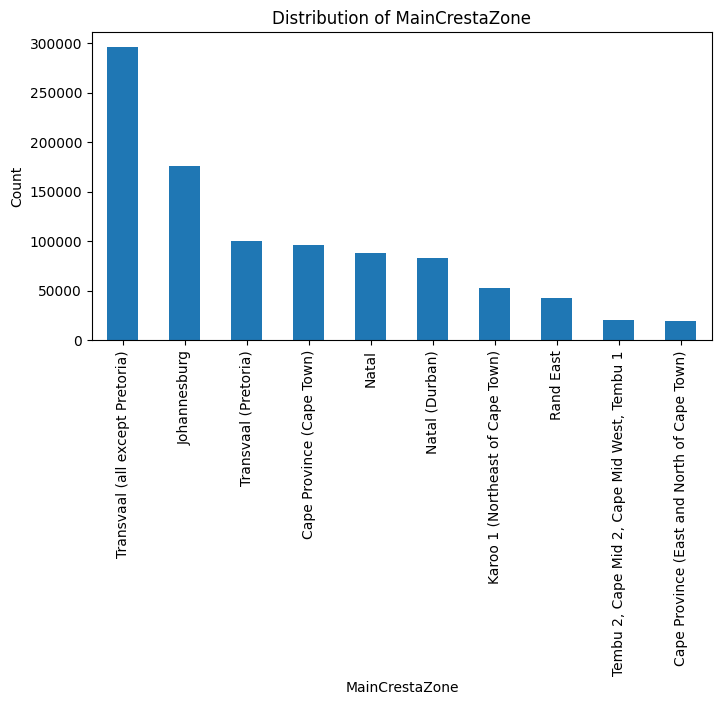

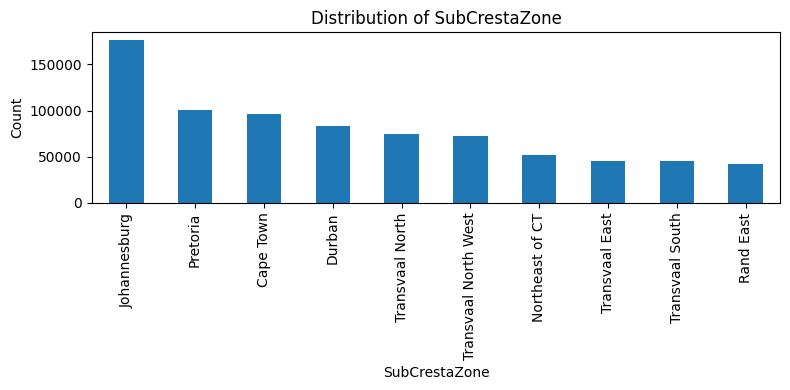

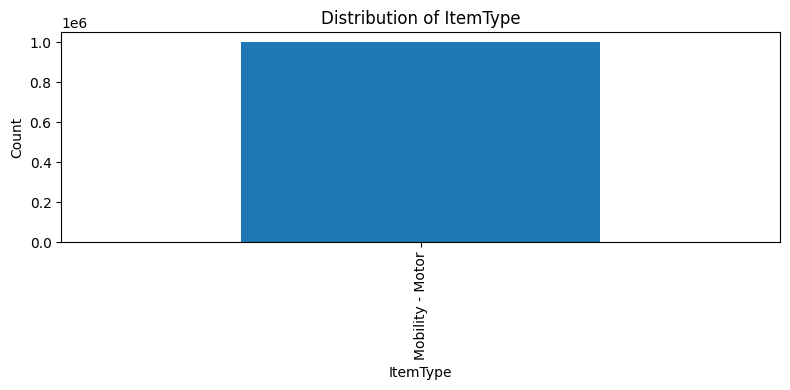

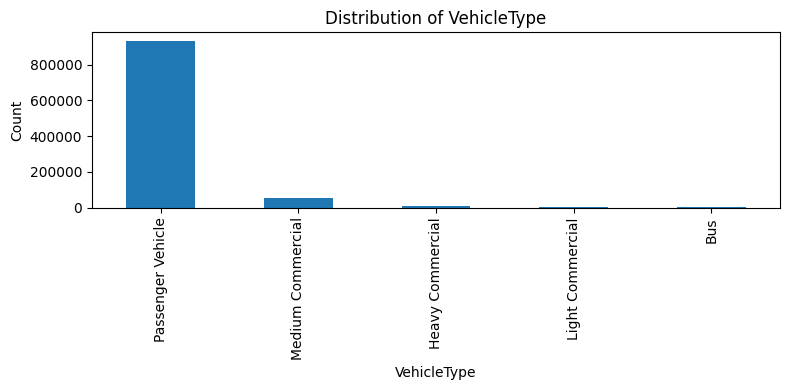

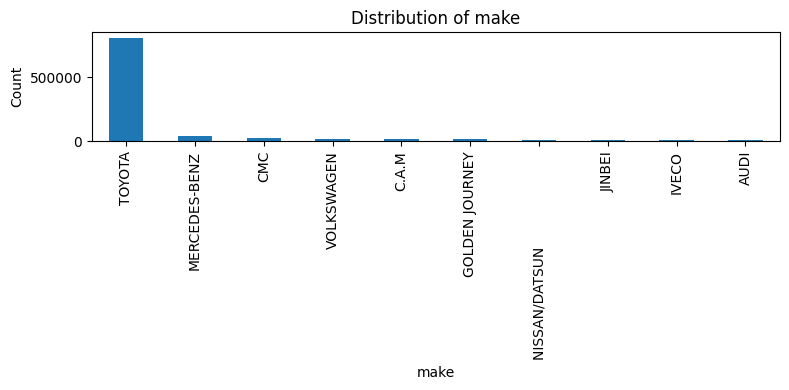

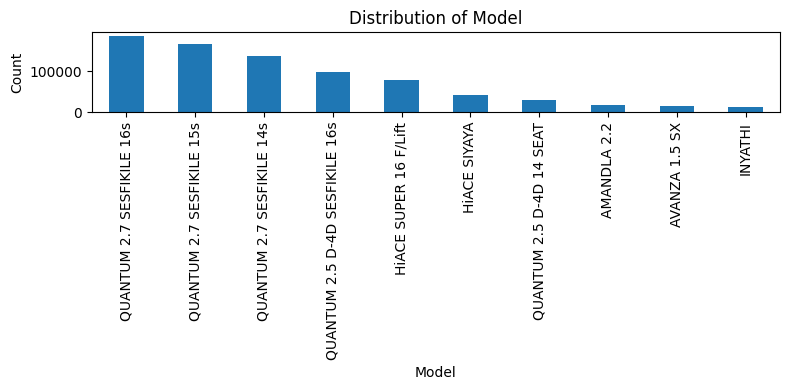

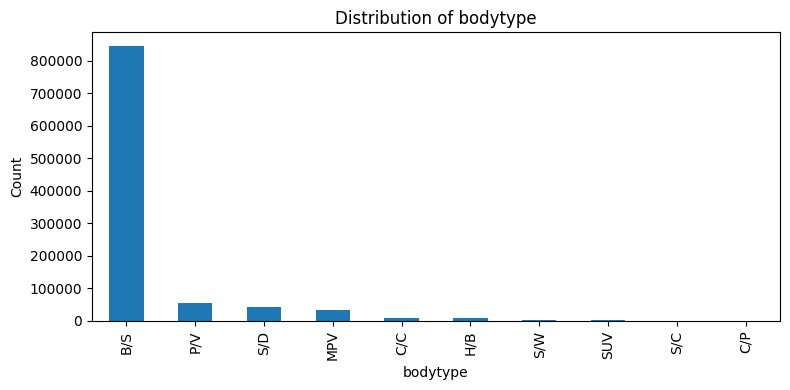

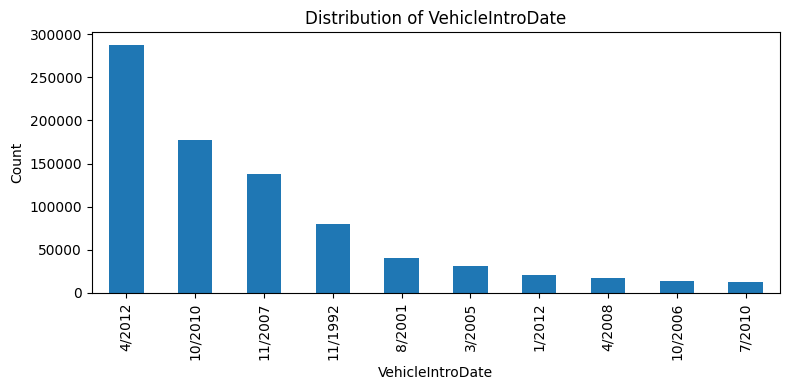

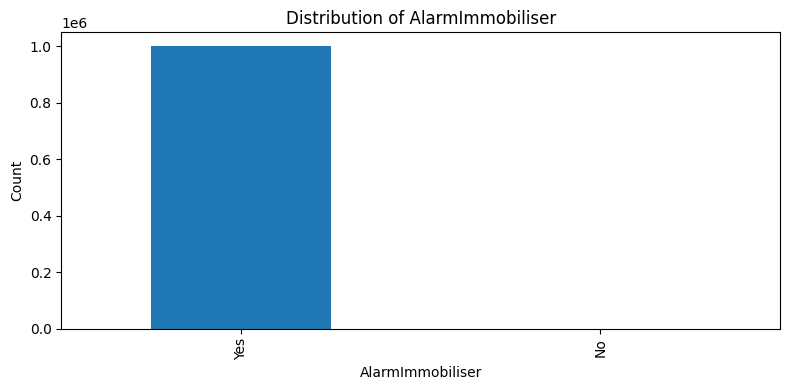

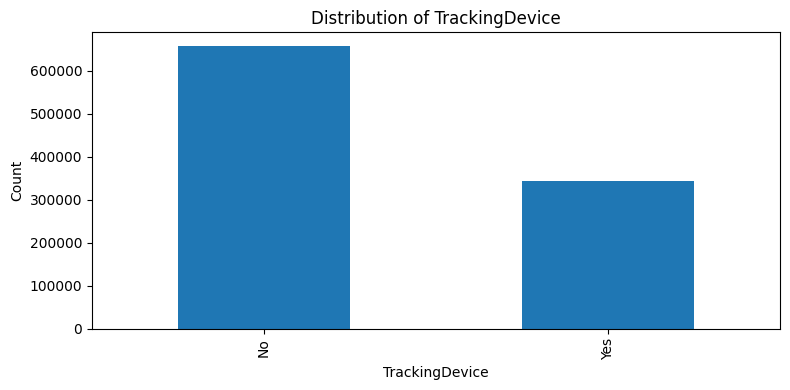

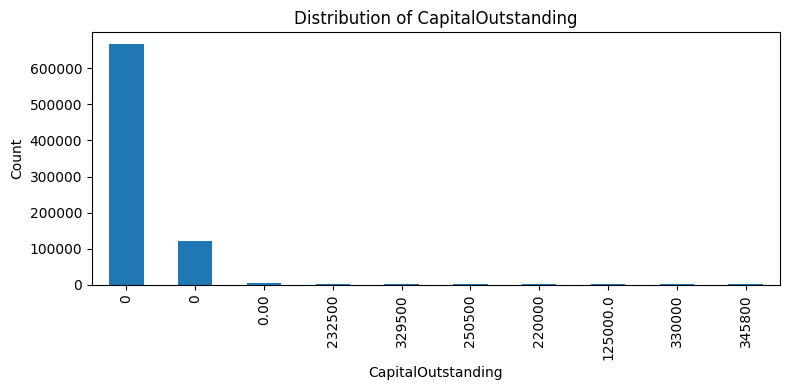

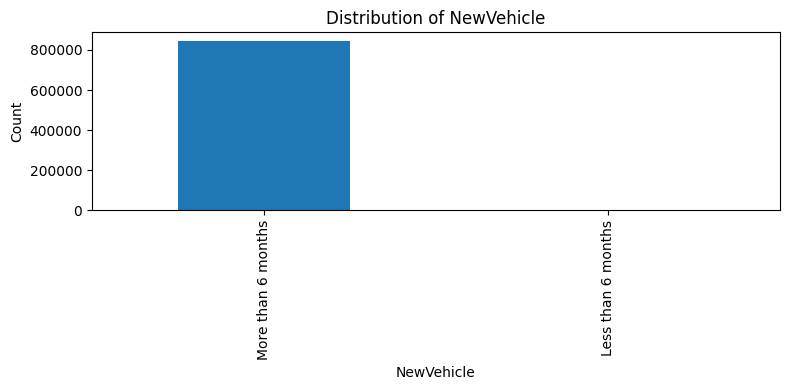

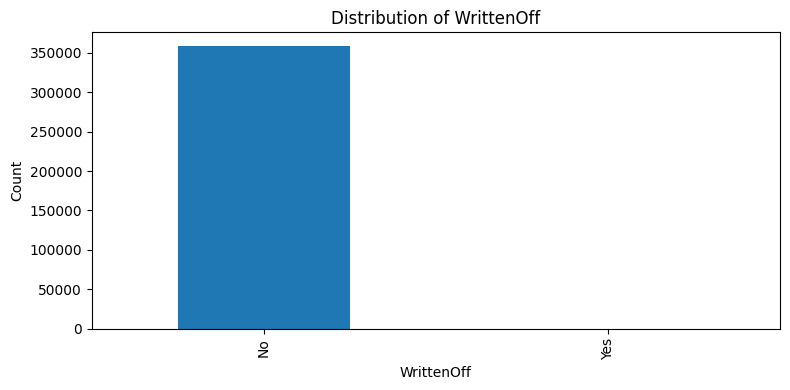

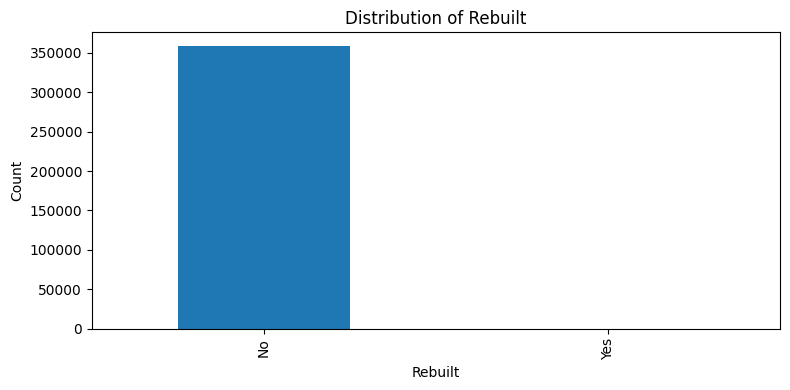

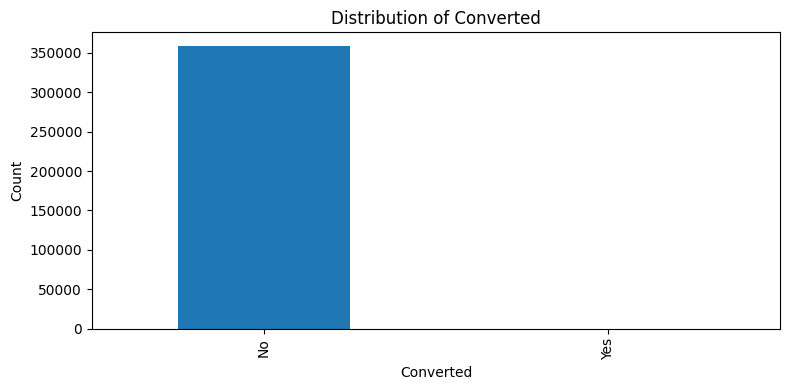

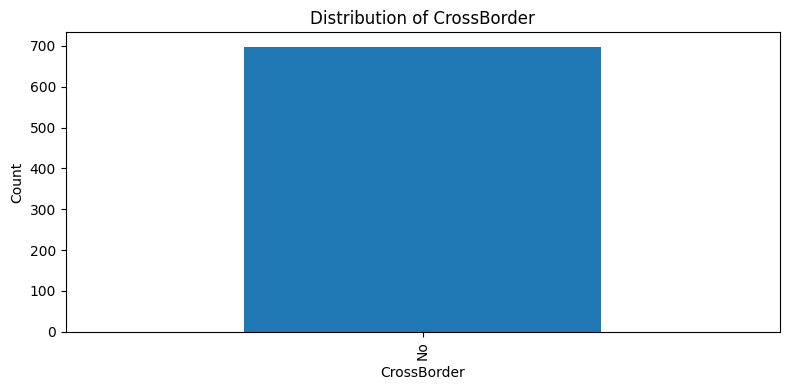

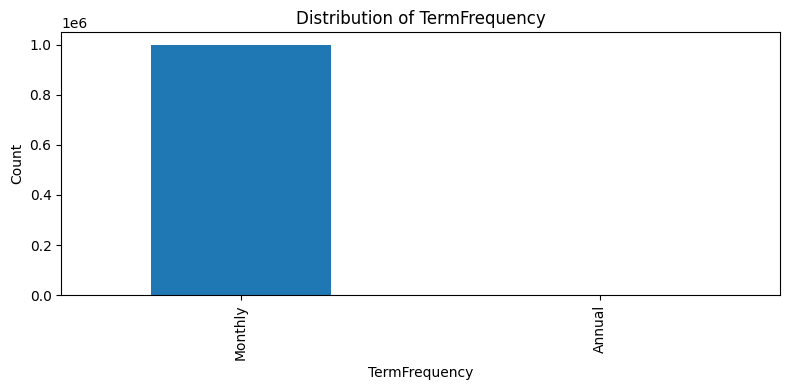

C:\Users\Yohanan\AppData\Local\Temp\ipykernel_12360\1018119369.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


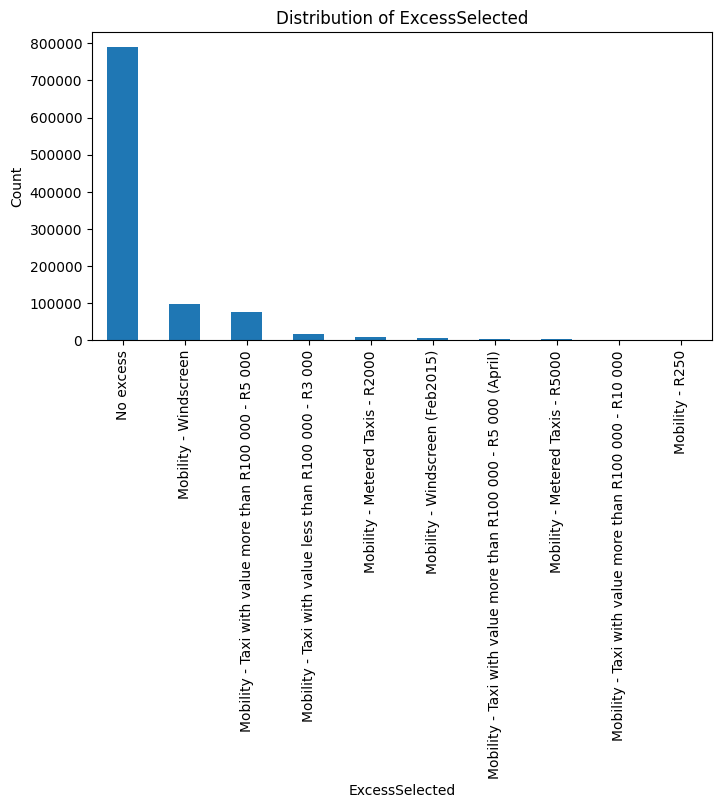

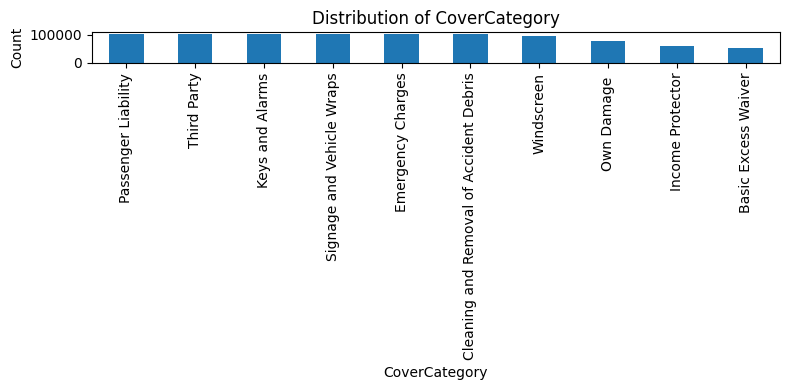

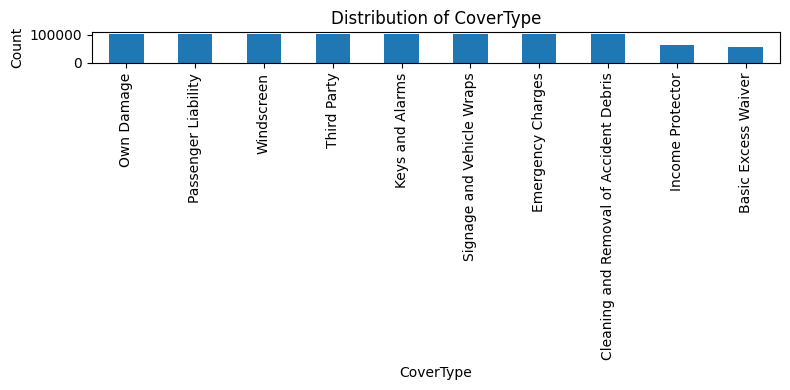

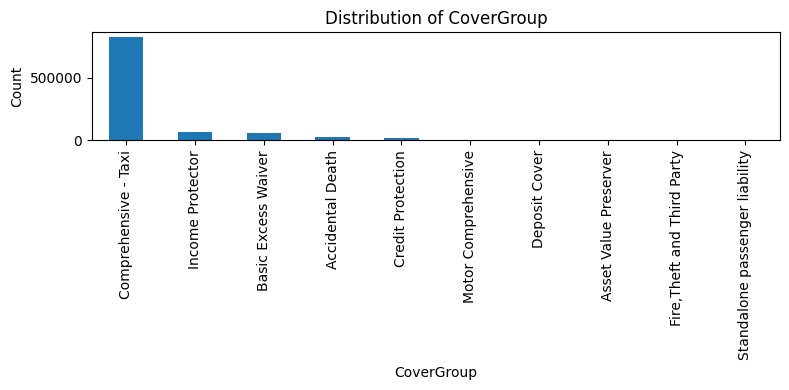

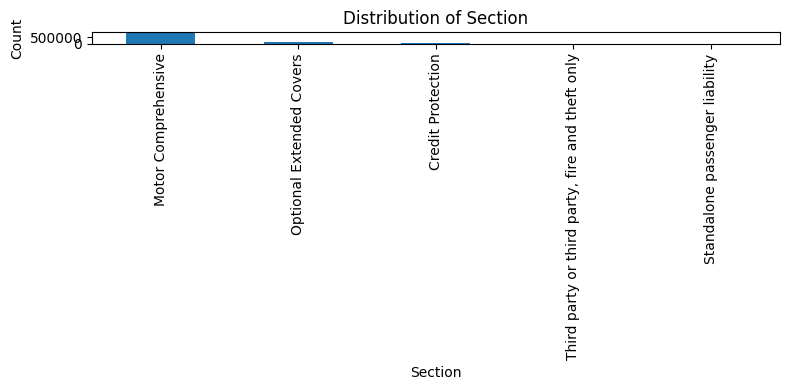

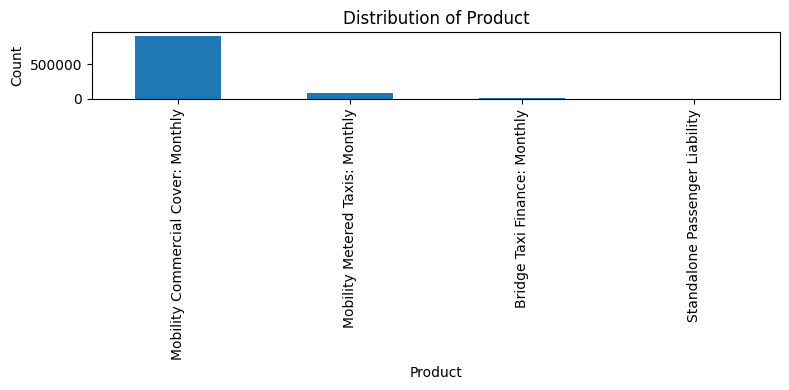

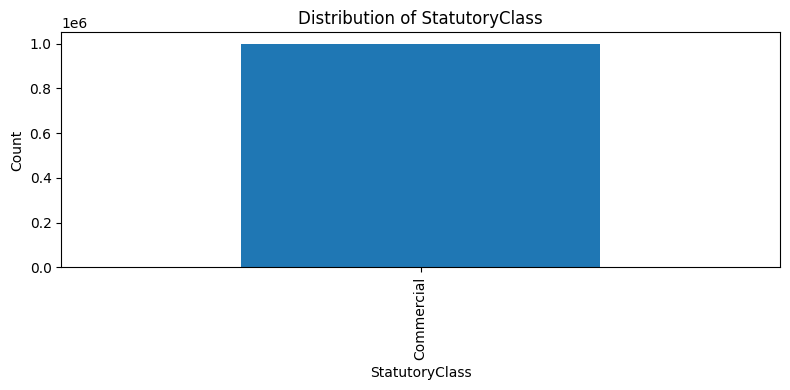

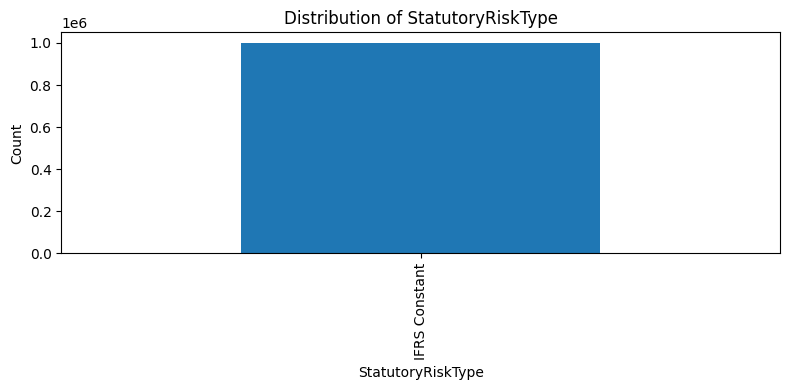

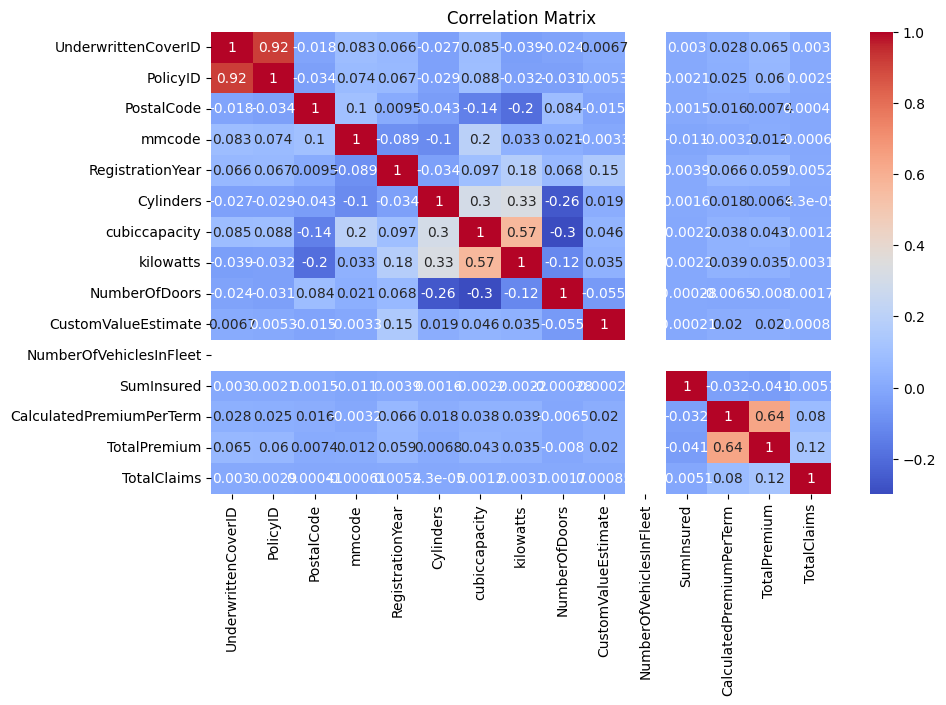

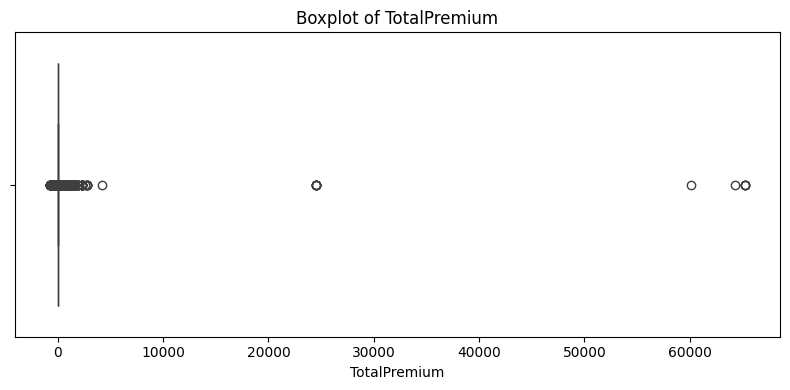

In [16]:
import csv

def txt_to_csv(input_file, output_file, delimiter=' '):
    """Converts a text file to a CSV file.

    Args:
        input_file (str): Path to the input TXT file.
        output_file (str): Path to the output CSV file.
        delimiter (str, optional): Delimiter used in the TXT file. Defaults to ' '.
    """
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.reader(infile, delimiter=delimiter)
        writer = csv.writer(outfile)
        for row in reader:
            writer.writerow(row)

# Convert the text file to CSV format
txt_to_csv("MachineLearningRating_v3.txt", "MachineLearningRating_v3.csv", delimiter=best_delim)
# read the CSV file into a DataFrame
df = pd.read_csv("MachineLearningRating_v3.csv")

# 1. Data Summarization
## Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

## Data types
print("\nData Types:\n", df.dtypes)
# 2. Data Quality Assessment
## Missing values
print("\nMissing Values:\n", df.isnull().sum())  
## Duplicates
print("\nDuplicate Rows:\n", df.duplicated().sum())
# Histograms for numerical columns
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()   
# Bar plots for categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    # 4. Bivariate/Multivariate Analysis
## Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Scatterplot: TotalPremium vs TotalClaim colored by ZipCode
if {'TotalPremium', 'TotalClaim', 'ZipCode'}.issubset(df.columns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='TotalPremium', y='TotalClaim', hue='ZipCode', palette='tab10')
    plt.title('TotalPremium vs TotalClaim by ZipCode')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    # 5. Data Comparison - Trends over Geography
if 'State' in df.columns:
    geo_df = df.groupby('State').agg({'TotalPremium': 'mean', 'TotalClaim': 'mean'}).reset_index()
    fig = px.choropleth(geo_df, locations='State', locationmode='USA-states',
                        color='TotalPremium', scope='usa',
                        title='Average TotalPremium by State')
    fig.show()
# 6. Outlier Detection
for col in ['TotalPremium', 'TotalClaim']:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()
# Plot 1: Interactive scatter
if {'TotalPremium', 'TotalClaim', 'AutoMake'}.issubset(df.columns):
    fig1 = px.scatter(df, x='TotalPremium', y='TotalClaim', color='AutoMake',
                      title='TotalPremium vs TotalClaim by AutoMake')
    fig1.show()

## Plot 2: Time trend (if date and cover type available)
if {'Date', 'CoverType', 'TotalPremium'}.issubset(df.columns):
    trend_df = df.groupby(['Date', 'CoverType'])['TotalPremium'].mean().reset_index()
    fig2 = px.line(trend_df, x='Date', y='TotalPremium', color='CoverType',
                   title='Monthly Premium Trends by Cover Type')
    fig2.show()

## Plot 3: Distribution of Auto Makes
if 'AutoMake' in df.columns:
    auto_counts = df['AutoMake'].value_counts().nlargest(10)
    fig3 = px.bar(auto_counts, x=auto_counts.index, y=auto_counts.values,
                  title='Top 10 Auto Makes in Insurance Data',
                  labels={'x': 'AutoMake', 'y': 'Count'})
    fig3.show()
    

In [16]:
%pip install pandas numpy matplotlib seaborn plotly nbformat
%pip install plotly
import pandas as pd
import plotly.express as px
# Plot 1: Interactive scatter
df = pd.read_csv("MachineLearningRating_v3.csv")
if {'TotalPremium', 'TotalClaim', 'AutoMake'}.issubset(df.columns):
    fig1 = px.scatter(df, x='TotalPremium', y='TotalClaim', color='AutoMake',
                      title='TotalPremium vs TotalClaim by AutoMake')
    fig1.show()

## Plot 2: Time trend (if date and cover type available)
trend_df = df.groupby(['CalculatedPremiumPerTerm', 'CoverType'])['TotalPremium'].mean().reset_index()
fig2 = px.line(trend_df, x='CalculatedPremiumPerTerm', y='TotalPremium', color='CoverType',
               title='Monthly Premium Trends by Cover Type')
fig2.show()

## Plot 3: Distribution of Auto Makes
if 'AutoMake' in df.columns:
    auto_counts = df['AutoMake'].value_counts().nlargest(10)
    fig3 = px.bar(auto_counts, x=auto_counts.index, y=auto_counts.values,
                  title='Top 10 Auto Makes in Insurance Data',
                  labels={'x': 'AutoMake', 'y': 'Count'})
    fig3.show()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


C:\Users\Yohanan\AppData\Local\Temp\ipykernel_3012\4055599097.py:6: DtypeWarning:

Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed